# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Reading in the Data

In [2]:
reddit = pd.read_csv('https://github.com/hemanth07mit/ml-project/blob/main/data/reddit_states.csv?raw=true')

In [3]:
reddit.shape

(9839, 8)

In [4]:
reddit.tail()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time
9834,coronavirusDC,BrightscapesArt,Art Project: Having Fun During Coronavirus,NaN,1,1595941346,district_of_columbia,2020-07-28 07:02:26
9835,coronavirusDC,jetrbby80316,Fauci now urges Americans to wear goggles. I a...,NaN,1,1596130037,district_of_columbia,2020-07-30 11:27:17
9836,coronavirusDC,_Cyberostrich_,"Please consider signing this petition, it woul...",NaN,1,1596499836,district_of_columbia,2020-08-03 18:10:36
9837,coronavirusDC,BrightscapesArt,Building A Fire Pit: Having Fun During Coronav...,NaN,1,1596545101,district_of_columbia,2020-08-04 06:45:01
9838,coronavirusDC,Szath01,Virginia contact tracing app COVIDWISE has bee...,NaN,1,1596671964,district_of_columbia,2020-08-05 17:59:24


In [5]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9839 entries, 0 to 9838
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     9839 non-null   object
 1   author        9839 non-null   object
 2   title         9839 non-null   object
 3   selftext      3334 non-null   object
 4   score         9839 non-null   int64 
 5   created_utc   9839 non-null   int64 
 6   state         9839 non-null   object
 7   eastern_time  9839 non-null   object
dtypes: int64(2), object(6)
memory usage: 615.1+ KB


# VADER with Reddit Posts

In [6]:
reddit['stripped_text'] = reddit['title'].replace('\nhttp\S+', '', regex=True).replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n\S+', '', regex=True)

In [7]:
reddit.head()

,subreddit,author,title,selftext,score,created_utc,state,eastern_time,stripped_text
0,CoronavirusAlabama,guarea,"After public apology, Montgomery councilman’s ...",NaN,1,1593606973,alabama,2020-07-01 08:36:13,"After public apology, Montgomery councilman’s ..."
1,CoronavirusAlabama,guarea,University of Alabama graduate tells his COVID...,NaN,1,1593607132,alabama,2020-07-01 08:38:52,University of Alabama graduate tells his COVID...
2,CoronavirusAlabama,guarea,Tuscaloosa adopts face mask law for public spaces,NaN,1,1593608257,alabama,2020-07-01 08:57:37,Tuscaloosa adopts face mask law for public spaces
3,CoronavirusAlabama,guarea,Coin shortage due to coronavirus: What’s happe...,NaN,0,1593615060,alabama,2020-07-01 10:51:00,Coin shortage due to coronavirus: What’s happe...
4,CoronavirusAlabama,houyam-love,[Study Results] How is Coronavirus Pandemic Af...,NaN,1,1593621148,alabama,2020-07-01 12:32:28,[Study Results] How is Coronavirus Pandemic Af...


In [8]:
corpus = reddit['stripped_text']

In [9]:
import nltk
nltk.download('vader_lexicon')

sia_reddit = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
# Code adapted from local lect: Modeling with VADER

dicts = []    

for post in corpus:   #loops through the individual post in the corpus
    scores = sia_reddit.polarity_scores(post)   #gets the sentiment scores for each post
    scores['text'] = post #puts post in a 'text' column
    dicts.append(scores)  #adds scores & text to empty dictionary

reddit_sia = pd.DataFrame(dicts)   #makes dataframe from empty dictionary
reddit_sia.head()

,neg,neu,pos,compound,text
0,0.125,0.626,0.249,0.2927,"After public apology, Montgomery councilman’s ..."
1,0.000,1.000,0.000,0.0000,University of Alabama graduate tells his COVID...
2,0.000,0.805,0.195,0.1779,Tuscaloosa adopts face mask law for public spaces
3,0.146,0.657,0.197,0.1779,Coin shortage due to coronavirus: What’s happe...
4,0.000,1.000,0.000,0.0000,[Study Results] How is Coronavirus Pandemic Af...


In [11]:
reddit_sia['state'] = reddit['state'].copy()
reddit_sia.head()

,neg,neu,pos,compound,text,state
0,0.125,0.626,0.249,0.2927,"After public apology, Montgomery councilman’s ...",alabama
1,0.000,1.000,0.000,0.0000,University of Alabama graduate tells his COVID...,alabama
2,0.000,0.805,0.195,0.1779,Tuscaloosa adopts face mask law for public spaces,alabama
3,0.146,0.657,0.197,0.1779,Coin shortage due to coronavirus: What’s happe...,alabama
4,0.000,1.000,0.000,0.0000,[Study Results] How is Coronavirus Pandemic Af...,alabama


In [12]:
reddit_sia.sort_values('pos', ascending = False).head()

,neg,neu,pos,compound,text,state
5449,0.0,0.0,1.0,0.4019,HELP,michigan
3859,0.0,0.0,1.0,0.5574,Fantastic.,illinois
3248,0.0,0.0,1.0,0.4215,LOL,georgia
8786,0.0,0.0,1.0,0.5859,Wow,texas
8743,0.0,0.0,1.0,0.2023,FYI,texas


In [13]:
reddit_sia.sort_values('neg', ascending = False).head()

,neg,neu,pos,compound,text,state
7981,1.0,0.0,0.0,-0.4404,Unemployment,texas
7390,1.0,0.0,0.0,-0.3182,Delay,tennessee
2485,1.0,0.0,0.0,-0.0772,Exposed?,colorado
7354,1.0,0.0,0.0,-0.6322,Wtf??,tennessee
8723,1.0,0.0,0.0,-0.1531,Shocker.,texas


In [14]:
reddit_sia.sort_values('neu', ascending = False).head()

,neg,neu,pos,compound,text,state
4919,0.0,1.0,0.0,0.0,Cease And Desist Order Issued To Bay State Cru...,massachusetts
5562,0.0,1.0,0.0,0.0,New update from Governor Whitmer,michigan
5502,0.0,1.0,0.0,0.0,Press Release: Upper Peninsula Cases “Dramatic...,michigan
5501,0.0,1.0,0.0,0.0,"Based on these New Case plots, Phase 2 seems m...",michigan
5500,0.0,1.0,0.0,0.0,Marathon in downtown Boyne City - Unmasked,michigan


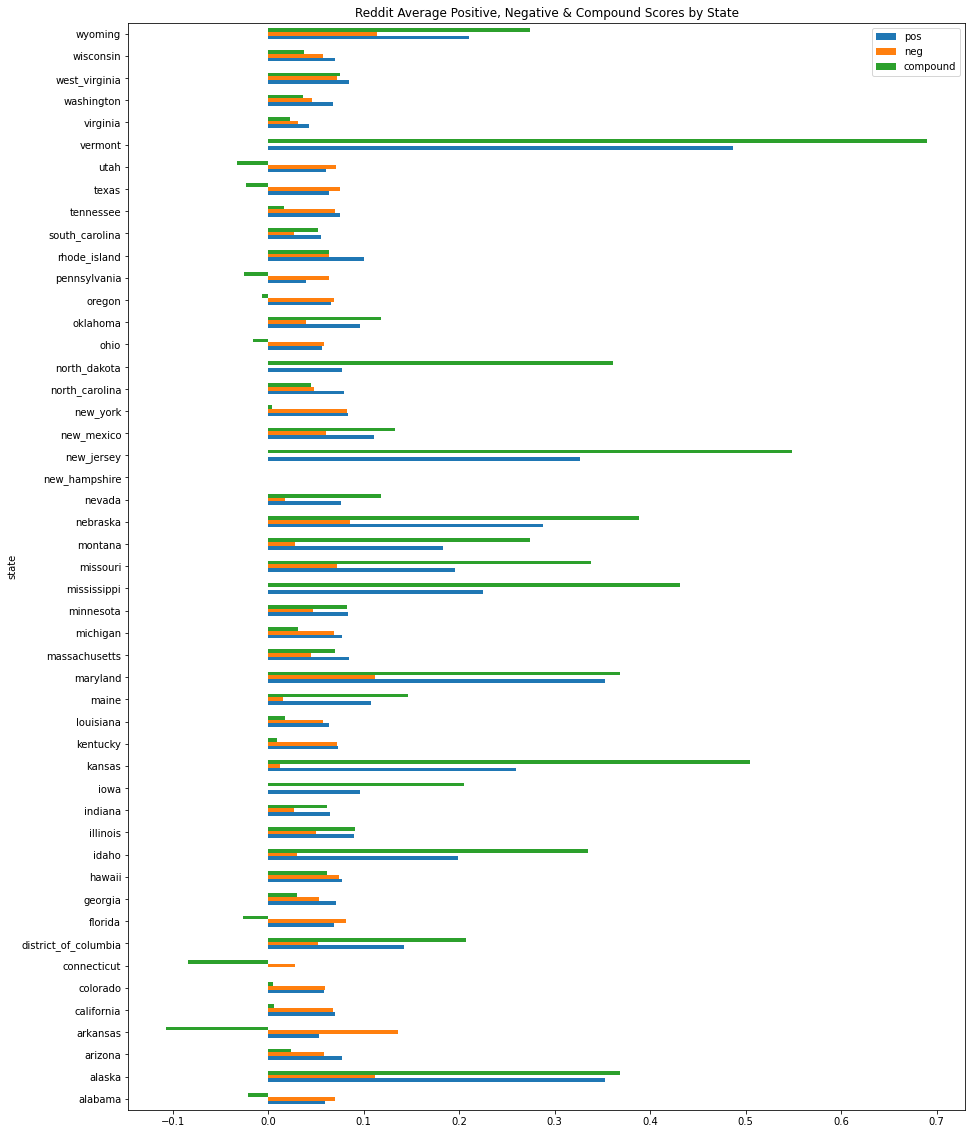

In [15]:
fig, ax = plt.subplots(figsize=(15, 20))
reddit_sia.groupby('state').mean()[['pos', 'neg', 'compound']].plot(kind='barh', ax=ax)
plt.title('Reddit Average Positive, Negative & Compound Scores by State');

In [16]:
reddit_sia[reddit_sia['state'] == 'new_hampshire']

,neg,neu,pos,compound,text,state
5769,0.0,1.0,0.0,0.0,How can I give constructive feedback on the ho...,new_hampshire


In [17]:
# reddit_sia.to_csv('./data/reddit_sentiment.csv', index = False)

# VADER with Twitter Tweets

In [18]:
twitter = pd.read_csv('https://github.com/hemanth07mit/ml-project/blob/main/data/twitter_data_eda.csv?raw=true')

In [19]:
twitter['state'] = twitter['state'].map({
    'AL':'alabama', 
    'AK':'alaska', 
    'AZ':'arizona', 
    'AR':'arkansas', 
    'CA':'california',
    'CO':'colorado', 
    'CT':'connecticut', 
    'DE':'delaware', 
    'DC':'district_of_columbia',
    'FL':'florida', 
    'GA':'georgia', 
    'HI':'hawaii', 
    'ID':'idaho', 
    'IL':'illinois', 
    'IN':'indiana',
    'IA':'iowa', 
    'KS':'kansas', 
    'KY':'kentucky', 
    'LA':'louisiana', 
    'ME':'maine', 
    'MD':'maryland',
    'MA':'massachusetts', 
    'MI':'michigan', 
    'MN':'minnesota', 
    'MS':'mississippi',
    'MO':'missouri', 
    'MT':'montana', 
    'NE':'nebraska', 
    'NV':'nevada', 
    'NH':'new_hampshire',
    'NJ':'new_jersey', 
    'NM':'new_mexico', 
    'NY':'new_york', 
    'NC':'north_carolina',
    'ND':'north_dakota', 
    'OH':'ohio', 
    'OK':'oklahoma', 
    'OR':'oregon', 
    'PA':'pennsylvania',
    'RI':'rhode_island', 
    'SC':'south_carolina', 
    'SD':'south_dakota', 
    'TN':'tennessee',
    'TX':'texas', 
    'UT':'utah', 
    'VT':'vermont', 
    'VA':'virginia', 
    'WA':'washington',
    'WV':'west_virginia', 
    'WI':'wisconsin', 
    'WY':'wyoming'
})

In [20]:
corpus_twit = twitter['stripped_text']

In [21]:
sia_twitter = SentimentIntensityAnalyzer()

In [22]:
# Code adapted from local lect: Modeling with VADER

dicts = []    

for post in corpus_twit:   #loops through the individual post in the corpus
    scores = sia_twitter.polarity_scores(post)   #gets the sentiment scores for each post
    scores['text'] = post #puts post in a 'text' column
    dicts.append(scores)  #adds scores & text to empty dictionary

twit_sia_df = pd.DataFrame(dicts)   #makes dataframe from empty dictionary
twit_sia_df.head()

,neg,neu,pos,compound,text
0,0.046,0.868,0.087,0.3802,What do you wear for a Summer dinner in San Fr...
1,0.000,1.000,0.000,0.0000,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #..."
2,0.079,0.686,0.234,0.6467,Glad @theranchanaheim didn’t let Covid stop th...
3,0.000,0.793,0.207,0.7184,Mellow Monday of the majestic motions afloat w...
4,0.000,1.000,0.000,0.0000,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...


In [23]:
twit_sia_df['state'] = twitter['state'].copy()
twit_sia_df.head()

,neg,neu,pos,compound,text,state
0,0.046,0.868,0.087,0.3802,What do you wear for a Summer dinner in San Fr...,california
1,0.000,1.000,0.000,0.0000,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #...",illinois
2,0.079,0.686,0.234,0.6467,Glad @theranchanaheim didn’t let Covid stop th...,california
3,0.000,0.793,0.207,0.7184,Mellow Monday of the majestic motions afloat w...,oregon
4,0.000,1.000,0.000,0.0000,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...,illinois


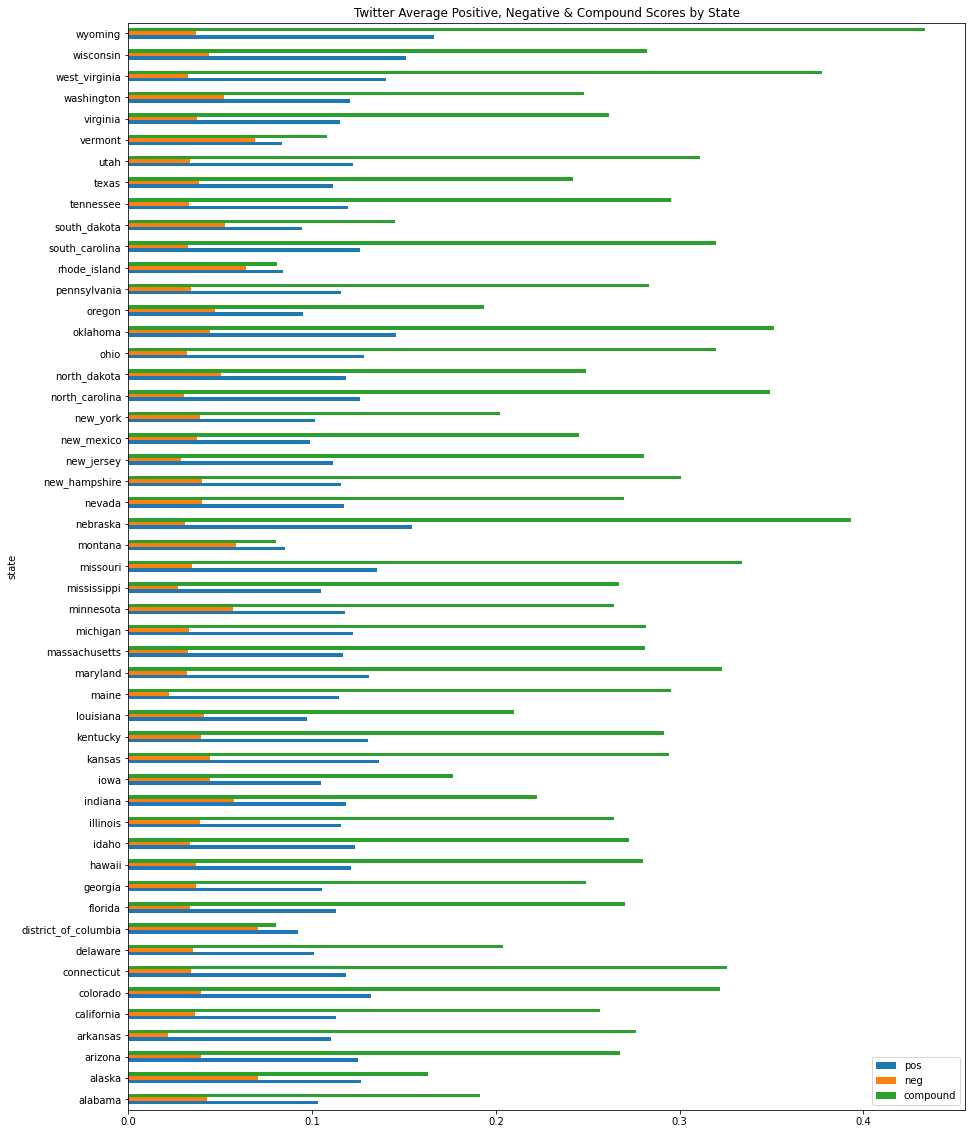

In [24]:
fig, ax = plt.subplots(figsize=(15, 20))
twit_sia_df.groupby('state').mean()[['pos', 'neg', 'compound']].plot(kind='barh', ax=ax)
plt.title('Twitter Average Positive, Negative & Compound Scores by State');

# Read in COVID-19 Policies

In [25]:
policies = pd.read_csv('https://github.com/hemanth07mit/ml-project/raw/main/data/dummied_policies.csv')

In [26]:
policies.head()

,Status of Reopening,Stay at Home Order,Large Gatherings Ban,Restaurant Limits,Bar Closures,Face Covering Requirement,Emergency Declaration,Location,dum_reopening,dum_stay_home,dum_gatherings,dum_restaurants,dum_bars,dum_masks,dum_emergency_declaration
0,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Yes,Alabama,0,1,1,1,1,1,1
1,Proceeding with Reopening,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for Certain Employees,Yes,Alaska,1,1,1,1,1,1,1
2,New Restrictions Imposed,Lifted,New Limit on Large Gatherings in Place,New Service Limits,Newly Closed,Required for Certain Employees; Allows Local O...,Yes,Arizona,0,1,0,0,0,1,1
3,Paused,-,Lifted,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,Yes,Arkansas,0,0,1,1,1,1,1
4,New Restrictions Imposed,Statewide,All Gatherings Prohibited,Newly Closed to Dine-in Service,Newly Closed,Required for General Public,Yes,California,0,0,0,0,0,1,1


In [27]:
policy_cols = ['Location','dum_reopening', 'dum_stay_home', 'dum_gatherings', 'dum_restaurants', 'dum_bars', 'dum_masks', 'dum_emergency_declaration']

In [28]:
policy_df = policies[policy_cols].copy()

In [29]:
policy_df.head()

,Location,dum_reopening,dum_stay_home,dum_gatherings,dum_restaurants,dum_bars,dum_masks,dum_emergency_declaration
0,Alabama,0,1,1,1,1,1,1
1,Alaska,1,1,1,1,1,1,1
2,Arizona,0,1,0,0,0,1,1
3,Arkansas,0,0,1,1,1,1,1
4,California,0,0,0,0,0,1,1


In [30]:
policy_df["Location"] = policy_df["Location"].str.lower()

In [31]:
policy_df['Location'].replace({
    'district of columbia':'district_of_columbia',
    'new hampshire':'new_hampshire',
    'new jersey':'new_jersey', 
    'new mexico':'new_mexico', 
    'new york':'new_york', 
    'north carolina':'north_carolina',
    'north dakota':'north_dakota', 
    'rhode island':'rhode_island', 
    'south carolina':'south_carolina', 
    'south dakota':'south_dakota', 
    'west virginia':'west_virginia'
}, inplace = True)

In [32]:
policy_df.rename(columns = {'Location': 'state'}, inplace = True)

# Renaming Twitter and Reddit Data

In [33]:
twitter['state'].unique()

array(['california', 'illinois', 'oregon', 'new_york', 'massachusetts',
       'florida', 'texas', 'utah', 'kansas', 'oklahoma', 'washington',
       'indiana', 'arizona', 'kentucky', 'pennsylvania',
       'district_of_columbia', 'north_carolina', 'ohio', 'maryland',
       'virginia', 'new_jersey', 'nevada', 'new_hampshire', 'georgia',
       'hawaii', 'michigan', 'south_carolina', 'connecticut', 'wisconsin',
       'alabama', 'mississippi', 'west_virginia', 'tennessee', 'maine',
       'arkansas', 'new_mexico', 'idaho', 'colorado', 'louisiana', 'iowa',
       'minnesota', 'missouri', 'montana', 'delaware', 'nebraska',
       'alaska', 'north_dakota', 'rhode_island', 'wyoming',
       'south_dakota', 'vermont'], dtype=object)

In [34]:
twit_sia_df.head()

,neg,neu,pos,compound,text,state
0,0.046,0.868,0.087,0.3802,What do you wear for a Summer dinner in San Fr...,california
1,0.000,1.000,0.000,0.0000,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #...",illinois
2,0.079,0.686,0.234,0.6467,Glad @theranchanaheim didn’t let Covid stop th...,california
3,0.000,0.793,0.207,0.7184,Mellow Monday of the majestic motions afloat w...,oregon
4,0.000,1.000,0.000,0.0000,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...,illinois


In [35]:
twit_sia_df.rename(columns={"neg": "twitter_neg", "neu": "twitter_neu", "pos":"twitter_pos", "compound":"twitter_compound"}, inplace=True)

In [36]:
twit_sia_df.head()

,twitter_neg,twitter_neu,twitter_pos,twitter_compound,text,state
0,0.046,0.868,0.087,0.3802,What do you wear for a Summer dinner in San Fr...,california
1,0.000,1.000,0.000,0.0000,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #...",illinois
2,0.079,0.686,0.234,0.6467,Glad @theranchanaheim didn’t let Covid stop th...,california
3,0.000,0.793,0.207,0.7184,Mellow Monday of the majestic motions afloat w...,oregon
4,0.000,1.000,0.000,0.0000,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...,illinois


In [37]:
twitter_sent = twit_sia_df.groupby('state')[["twitter_neg", "twitter_neu", "twitter_pos", "twitter_compound"]].mean().copy()
twitter_sent.head()

,twitter_neg,twitter_neu,twitter_pos,twitter_compound
state,,,,
alabama,0.043012,0.853869,0.103101,0.191440
alaska,0.070750,0.802833,0.126375,0.162979
arizona,0.039618,0.835553,0.124826,0.267638
arkansas,0.021817,0.867620,0.110592,0.276177
california,0.036297,0.850667,0.113036,0.256875


In [38]:
reddit_sia.head()

,neg,neu,pos,compound,text,state
0,0.125,0.626,0.249,0.2927,"After public apology, Montgomery councilman’s ...",alabama
1,0.000,1.000,0.000,0.0000,University of Alabama graduate tells his COVID...,alabama
2,0.000,0.805,0.195,0.1779,Tuscaloosa adopts face mask law for public spaces,alabama
3,0.146,0.657,0.197,0.1779,Coin shortage due to coronavirus: What’s happe...,alabama
4,0.000,1.000,0.000,0.0000,[Study Results] How is Coronavirus Pandemic Af...,alabama


In [39]:
reddit_sia.rename(columns={"neg": "reddit_neg", "neu": "reddit_neu", "pos":"reddit_pos", "compound":"reddit_compound"}, inplace=True)

In [40]:
data = [{'reddit_neg':0, "reddit_neu":0, "reddit_pos":0, 'reddit_compound':0, 'text': '', 'state': 'delaware'}]

In [41]:
reddit_sia.loc['delaware']=list(data[0].values())
#code adapted from: https://kanoki.org/2019/08/03/add-new-rows-and-columns-to-pandas-dataframe/

In [42]:
data = [{'reddit_neg':0, "reddit_neu":0, "reddit_pos":0, 'reddit_compound':0, 'text': '', 'state': 'south_dakota'}]

In [43]:
reddit_sia.loc['south_dakota']=list(data[0].values())

# Combining All Data

In [44]:
health = pd.read_csv('https://github.com/hemanth07mit/ml-project/raw/main/data/health.csv')

In [45]:
health.rename(columns = {'Unnamed: 0': 'state'}, inplace = True)

In [46]:
health.head()

,state,death_tot,hosp_tot,pos_tot,test_tot,pos_test_rate
0,alaska,9,0,2737,120921,0.0226
1,alabama,630,7752,49678,282815,0.1757
2,arkansas,183,1439,21734,192266,0.1130
3,arizona,2062,6524,94795,401387,0.2362
4,california,3025,0,264856,3643902,0.0727


## Twitter

In [47]:
twit_sia_df.head()

,twitter_neg,twitter_neu,twitter_pos,twitter_compound,text,state
0,0.046,0.868,0.087,0.3802,What do you wear for a Summer dinner in San Fr...,california
1,0.000,1.000,0.000,0.0000,"𝟞.𝟚𝟠.𝟚𝟘𝟚𝟘 ""𝕟𝕖𝕨"" 𝕙𝕒𝕚𝕣 𝕕𝕠𝕟'𝕥 𝕔𝕒𝕣𝕖 🖤 #🖕🏼covid19 #...",illinois
2,0.079,0.686,0.234,0.6467,Glad @theranchanaheim didn’t let Covid stop th...,california
3,0.000,0.793,0.207,0.7184,Mellow Monday of the majestic motions afloat w...,oregon
4,0.000,1.000,0.000,0.0000,🌳ℐ 𝓁𝑜𝓋𝑒 𝑜𝓊𝓇 𝓃𝑒𝓌 𝓃𝑒𝒾𝑔𝒽𝒷𝑜𝓇𝒽𝑜𝑜𝒹 #covid19 #phase3 ...,illinois


In [48]:
all_tweets_policy = twit_sia_df.merge(policy_df, left_on = 'state', right_on = 'state')

In [49]:
tweets_combined_data = all_tweets_policy.merge(health, left_on = 'state', right_on = 'state')

In [50]:
pos_or_neg = []
for row in range(0, len(all_tweets_policy)):
    if tweets_combined_data['twitter_neg'][row] > tweets_combined_data['twitter_pos'][row]:
        value = "neg"
    elif tweets_combined_data['twitter_neg'][row] < tweets_combined_data['twitter_pos'][row]:
        value = 'pos'
    pos_or_neg.append(value)

In [51]:
tweets_combined_data['pos_or_neg_sent'] = pos_or_neg

In [52]:
tweets_combined_data.tail()

,twitter_neg,twitter_neu,twitter_pos,twitter_compound,text,state,dum_reopening,dum_stay_home,dum_gatherings,dum_restaurants,dum_bars,dum_masks,dum_emergency_declaration,death_tot,hosp_tot,pos_tot,test_tot,pos_test_rate,pos_or_neg_sent
19695,0.232,0.508,0.260,-0.0258,@garywhitta God please let Trump and sons be a...,vermont,1,1,1,1,1,1,1,1,0,206,28604,0.0072,pos
19696,0.283,0.620,0.097,-0.7003,“Wartime President”? Anyone that still support...,vermont,1,1,1,1,1,1,1,1,0,206,28604,0.0072,neg
19697,0.000,1.000,0.000,0.0000,WORD 💪🏾✊🏾 @knerolapae #covid19 #hustle #word #...,vermont,1,1,1,1,1,1,1,1,0,206,28604,0.0072,neg
19698,0.000,0.887,0.113,0.5904,@00PN00 lays his heart out. #comedy #drama #si...,vermont,1,1,1,1,1,1,1,1,0,206,28604,0.0072,pos
19699,0.255,0.745,0.000,-0.8020,@garywhitta This is what the executive branch ...,vermont,1,1,1,1,1,1,1,1,0,206,28604,0.0072,neg


In [53]:
tweets_combined_data['pos_or_neg_sent'].value_counts()

pos    15028
neg     4672
Name: pos_or_neg_sent, dtype: int64

In [54]:
tweets_combined_data= tweets_combined_data[['state', 'twitter_neg', 'twitter_neu', 'twitter_pos', 'twitter_compound', 'text',
        'dum_reopening', 'dum_stay_home', 'dum_gatherings',
       'dum_restaurants', 'dum_bars', 'dum_masks', 'dum_emergency_declaration',
       'death_tot', 'hosp_tot', 'pos_tot', 'test_tot', 'pos_test_rate',
       'pos_or_neg_sent']]



## Reddit

In [55]:
all_reddit_policy = reddit_sia.merge(policy_df, left_on = 'state', right_on = 'state')

In [56]:
reddit_combined_data = all_reddit_policy.merge(health, left_on = 'state', right_on = 'state')

In [57]:
pos_or_neg = []
for row in range(0, len(reddit_combined_data)):
    if reddit_combined_data['reddit_neg'][row] > reddit_combined_data['reddit_pos'][row]:
        value = "neg"
    elif reddit_combined_data['reddit_neg'][row] < reddit_combined_data['reddit_pos'][row]:
        value = 'pos'
    pos_or_neg.append(value)

In [58]:
reddit_combined_data['pos_or_neg_sent'] = pos_or_neg

In [59]:
reddit_combined_data.tail()

,reddit_neg,reddit_neu,reddit_pos,reddit_compound,text,state,dum_reopening,dum_stay_home,dum_gatherings,dum_restaurants,dum_bars,dum_masks,dum_emergency_declaration,death_tot,hosp_tot,pos_tot,test_tot,pos_test_rate,pos_or_neg_sent
9836,0.000,0.777,0.223,0.3182,"Please consider signing this petition, it woul...",district_of_columbia,1,1,1,1,0,1,1,34,0,1799,91446,0.0197,pos
9837,0.224,0.467,0.308,0.2263,Building A Fire Pit: Having Fun During Coronav...,district_of_columbia,1,1,1,1,0,1,1,34,0,1799,91446,0.0197,pos
9838,0.000,1.000,0.000,0.0000,Virginia contact tracing app COVIDWISE has bee...,district_of_columbia,1,1,1,1,0,1,1,34,0,1799,91446,0.0197,pos
9839,0.000,0.000,0.000,0.0000,,delaware,0,1,1,1,1,1,1,76,0,3314,70166,0.0472,pos
9840,0.000,0.000,0.000,0.0000,,south_dakota,1,0,1,0,1,0,1,39,158,2000,31547,0.0634,pos


In [60]:
reddit_combined_data['pos_or_neg_sent'].value_counts()

pos    5362
neg    4479
Name: pos_or_neg_sent, dtype: int64

In [61]:
reddit_combined_data = reddit_combined_data[['state', 'reddit_neg', 'reddit_neu', 'reddit_pos', 'reddit_compound', 'text',
        'dum_reopening', 'dum_stay_home', 'dum_gatherings',
       'dum_restaurants', 'dum_bars', 'dum_masks', 'dum_emergency_declaration',
       'death_tot', 'hosp_tot', 'pos_tot', 'test_tot', 'pos_test_rate',
       'pos_or_neg_sent']]